# Random Forrest Model

## Einleitung



In [1]:
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns

%matplotlib inline

pd.options.display.precision = 10

## Umgebungsvariablen

In [2]:
#feature generated 24.03.2019
earthquake_daten = '''C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/earthquake_data/'''
feature_62900_94 = 'Features_62900-94.csv'
feature_41934_94 = 'Features_41934_94.csv'
Features_4194_94 = 'Features_4194_94.csv'

# Feature laden

In [45]:
train_data = pd.read_csv(earthquake_daten+feature_41934_94)
train_data = shuffle(train_data, random_state=10)

In [46]:
feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])

## Feature Filtern

In [5]:
items_to_filter = ['']

In [6]:
filtered_feature_data = feature_data.filter(items=items_to_filter)

In [24]:
feature_data = filtered_feature_data

# Model Workbench

## Imports

In [3]:
# Scaler

# Model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Modell
from sklearn.ensemble import RandomForestRegressor


Quelle: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [4]:
def getMostImportendFeatuers(feat_imp, topAmount):
    '''Gibt die wichtigsten Features zurück. Wird benötigt, um die Trainingsdaten und Testdaten 
    anhand Featuers zu filtern.'''
    i = 0
    featureFilter = list()
    for feature in feat_imp:
        featureFilter.append(feature)
        i +=1
        if i >= topAmount:
            break
    return featureFilter

In [5]:
def modelfit(alg, dtrain, time_to_failure, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain, time_to_failure)
      
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)

    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain, time_to_failure, cv=cv_folds, scoring='neg_mean_absolute_error',n_jobs=-1)
    
    #Print model report:
    print("\nModel Report")
    print("MAE train data: %.4g" % mean_absolute_error(time_to_failure, dtrain_predictions)) 
    
    if performCV:
        print("CV Score MAE: \nMean %.7g \nStd %.7g \nMin %.7g \nMax %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, dtrain.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances',figsize=(15,10))
        plt.ylabel('Feature Importance Score')
        plt.show()
        print('Top 20 Feature')
        print(getMostImportendFeatuers(feat_imp.index,20))

In [1]:
def test_Model_with_62900_test_train_split(model,feature_filter=['spec_cent_75%q', 'mean', 'zero_crossings', 'skew', 'min', 'psd_kurt', 'spec_cent_min', 'kurt', 'chroma_stft_skew', 'spec_bw_skew', 'spec_cent_absMax', 'psd_25%q', 'spec_bw_99%q', 'psd_5%q', 'chroma_stft_75%q', '75%q', 'rolloff_max', 'spec_bw_max', 'chroma_stft_min', 'rms_25%q', 'rms_min', 'rms_5%q', 'psd_1%q', 'psd_min', '25%q', 'chroma_stft_5%q', 'rms_skew', 'rms_kurt', 'chroma_stft_99%q', 'chroma_stft_95%q', 'chroma_stft_max']):
    #load Features_62900
    train_data = pd.read_csv(earthquake_daten+feature_62900_94)
    train_data = shuffle(train_data, random_state=10)
    feature_data = train_data.iloc[:,1:95]
    time_to_failure = np.array(train_data.iloc[:,-1])

    filtered_feature = feature_data.filter(items=feature_filter)   

    X_train, X_test, y_train, y_test = train_test_split(filtered_feature, time_to_failure, test_size=0.20, random_state=42,shuffle=True)
    
    #fit model
    model.fit(X_train,y_train)
    
    #predict
    prediction = model.predict(X_test)
    
    print("MAE train / test data: %.4g" % mean_absolute_error(y_test, prediction)) 

# Baseline 94 Features / 41934 rows

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Model Report
MAE train data: 0.6351
CV Score MAE: 
Mean -1.662746 
Std 0.01025364 
Min -1.680364 
Max -1.652062


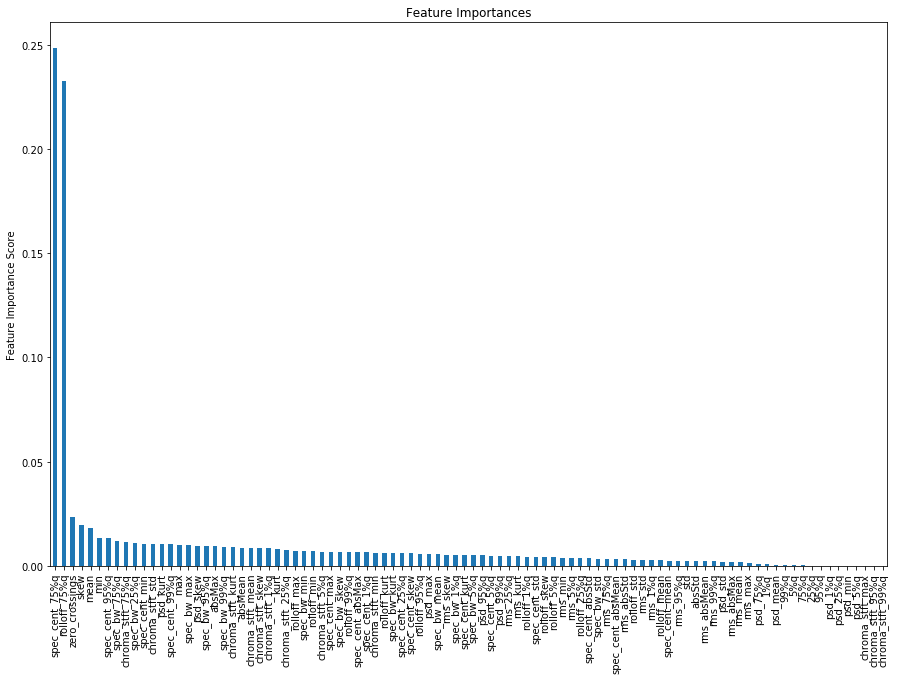

Top 20 Feature
['spec_cent_75%q', 'rolloff_75%q', 'zero_crossings', 'skew', 'mean', 'min', 'spec_cent_95%q', 'spec_bw_75%q', 'chroma_stft_75%q', 'spec_bw_25%q', 'spec_cent_min', 'chroma_stft_std', 'psd_kurt', 'spec_cent_99%q', 'max', 'spec_bw_max', 'psd_skew', 'spec_bw_95%q', 'absMax', 'spec_bw_99%q']


In [8]:
gbm0 = RandomForestRegressor(random_state=10)
modelfit(gbm0, feature_data, time_to_failure)

In [ ]:
gbm0 = RandomForestRegressor(random_state=10)
test_Model_with_62900_test_train_split(gbm0)

# Model with 20 Features

### Filter Feature
Anhand Feature importence (

In [35]:
# Erhalten aus dem Notebook Model_CatBoost_94
items_to_filter = ['spec_cent_75%q', 'rolloff_75%q', 'zero_crossings', 'skew', 'mean', 'min', 'spec_cent_95%q', 'spec_bw_75%q', 'chroma_stft_75%q', 'spec_bw_25%q', 'spec_cent_min', 'chroma_stft_std', 'psd_kurt', 'spec_cent_99%q', 'max', 'spec_bw_max', 'psd_skew', 'spec_bw_95%q', 'absMax', 'spec_bw_99%q']
filtered_feature_data = feature_data.filter(items=items_to_filter)  

## Feature Analyse

In [10]:
filtered_feature_data.describe()

,spec_cent_75%q,rolloff_75%q,zero_crossings,skew,mean,min,spec_cent_95%q,spec_bw_75%q,chroma_stft_75%q,spec_bw_25%q,spec_cent_min,chroma_stft_std,psd_kurt,spec_cent_99%q,max,spec_bw_max,psd_skew,spec_bw_95%q,absMax,spec_bw_99%q
count,41934.0000000000,4.1934000000e+04,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000,41934.0000000000
mean,742387.2523088438,1.4689638778e+06,12364.2003386274,0.1252057914,4.5194207052,-149.3662421901,766501.4226891467,578274.0256393899,0.9960778405,557027.9247439427,344798.2757470835,0.0323486304,21.3592964286,778480.6493136616,163.5435923117,593198.4810650084,4.3532761010,585354.5354653193,170.2135260171,589786.5755651240
std,20776.6077719682,2.0638896524e+04,2350.7020123311,0.4860815241,0.2561034062,266.0096389602,12738.7647896970,3704.6218152966,0.0004022110,15881.1905858769,62219.3811823401,0.0042966760,7.5717075103,10906.2656700791,273.7562474249,3214.8826617986,0.6992302210,2555.3326193667,297.8494453362,2535.7152379601
min,539282.7949792275,1.1894531250e+06,5124.0000000000,-5.5187945968,3.5550933333,-5515.0000000000,647020.8741038998,517037.1742718818,0.9944736881,359230.6531110291,163127.6009887653,0.0313598574,3.9797691222,685581.1692499927,23.0000000000,573419.4385050547,1.8558664322,560509.7559190223,23.0000000000,569021.1015906825
25%,728775.4999623451,1.4550781250e+06,10627.0000000000,-0.0386432786,4.3517900000,-155.0000000000,757997.6752581031,576065.4411271894,0.9957810338,549252.2569360731,302540.2457666902,0.0315135407,15.8853275321,771139.6257478471,91.0000000000,591018.0025069662,3.8615123630,583652.6131847689,93.0000000000,588076.5654180326
50%,742654.9275670950,1.4687500000e+06,12508.0000000000,0.0862328996,4.5227633333,-110.0000000000,766364.8596778678,578318.5132638491,0.9960075051,558842.0486257107,339053.1306224105,0.0315368287,20.3492070936,778575.8005626197,123.0000000000,593052.8389875928,4.2880156040,585350.7299477484,127.0000000000,589803.3499884446
75%,758660.7690201603,1.4843750000e+06,14132.0000000000,0.2564331411,4.6929233333,-79.0000000000,775932.4720382815,580908.6034652712,0.9963500087,568587.5202436801,381883.5144340553,0.0316830071,25.4352391253,786310.7917208141,170.0000000000,595212.2423848667,4.7566037178,587196.4704127871,175.0000000000,591519.5543170404
max,787634.4965454257,1.5097656250e+06,19956.0000000000,10.5922843032,5.4638133333,-15.0000000000,801471.0921077820,586966.0075451231,0.9973329692,578136.8393907149,633338.5852294917,0.1073670515,70.4963456266,815506.4591200568,5444.0000000000,613786.0689322522,7.9966616631,592806.6277031272,5515.0000000000,598756.1276749838


### Verteilung der einzelnen Features

Text(0.5, 0.98, 'Feature Histogramm')

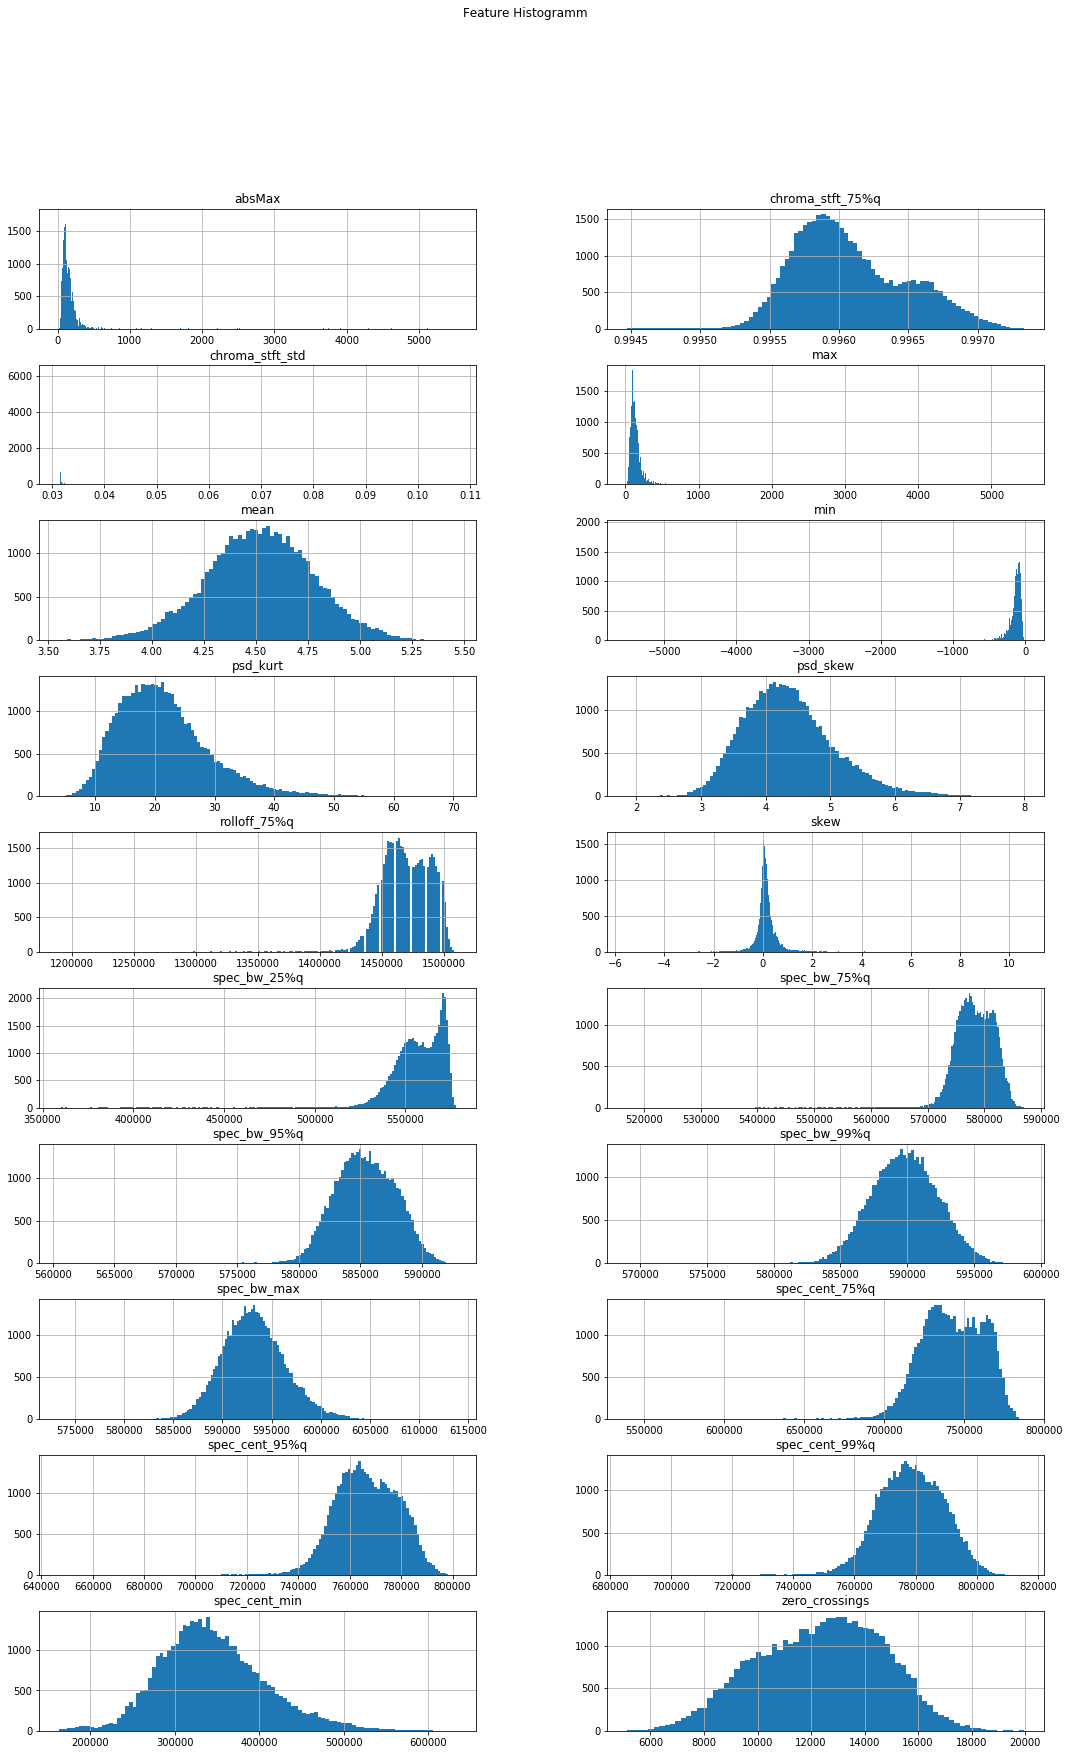

In [11]:
axes = filtered_feature_data.hist(bins='auto', figsize=(18, 28), layout=(10, 2))
plt.suptitle("Feature Histogramm")

### Korrelationen zwischen den Features

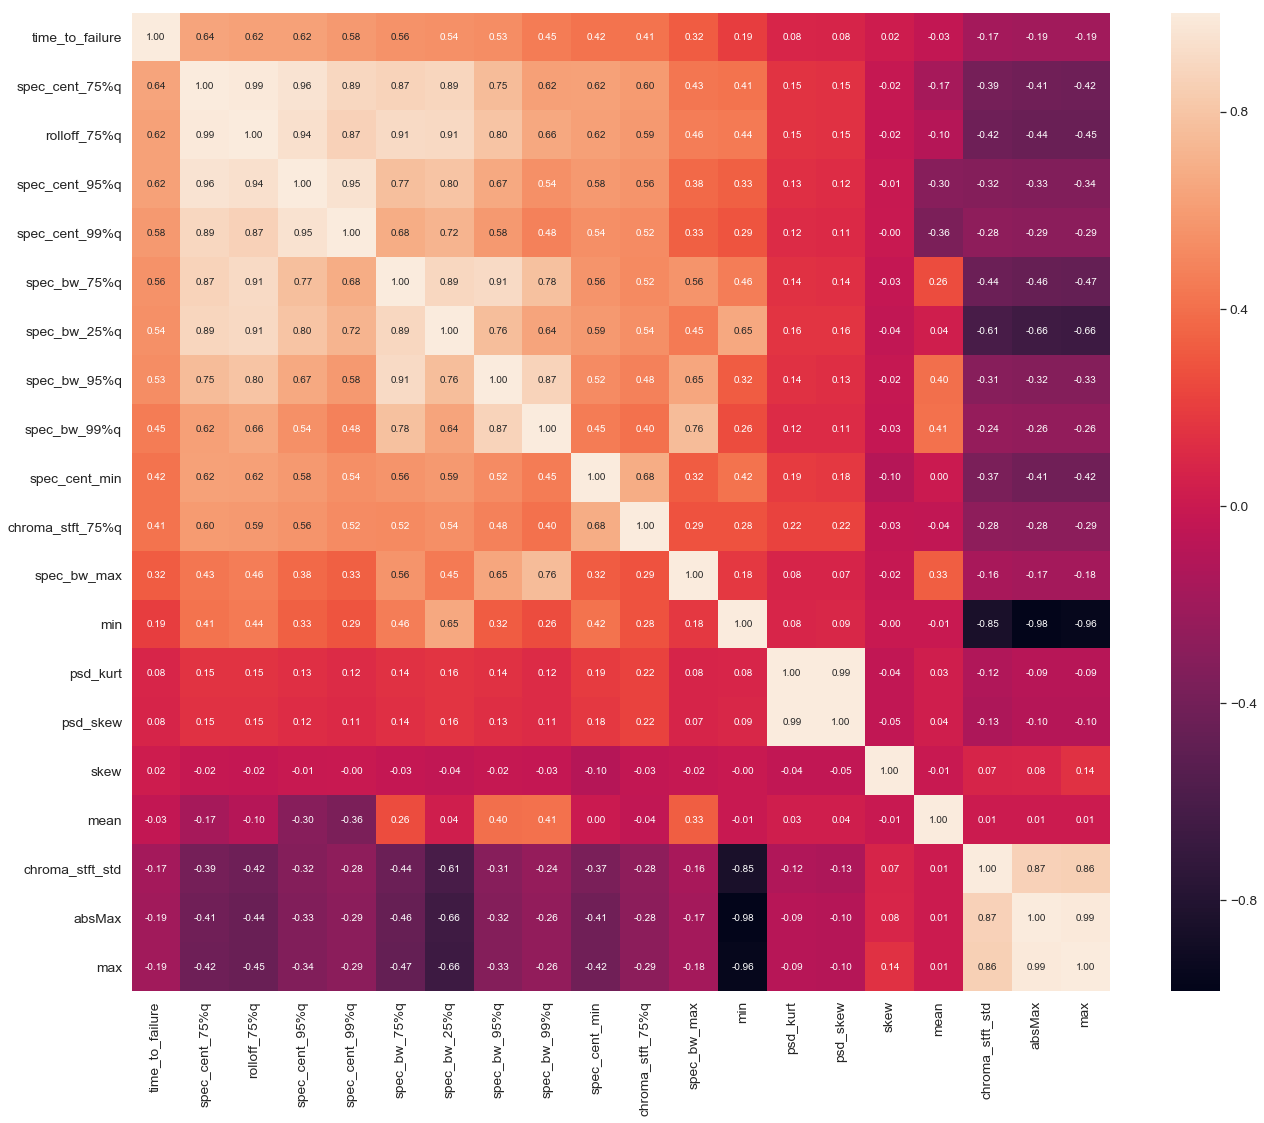

In [36]:
filtered_feature_data_corr = filtered_feature_data
filtered_feature_data_corr['time_to_failure'] = time_to_failure
corr = filtered_feature_data_corr.corr()

k = 20
plt.subplots(figsize=(22,18))
cols = corr.nlargest(k, 'time_to_failure')['time_to_failure'].index
cm = np.corrcoef(filtered_feature_data_corr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Model Report
MAE train data: 0.5969
CV Score MAE: 
Mean -1.581617 
Std 0.008531993 
Min -1.592723 
Max -1.572425


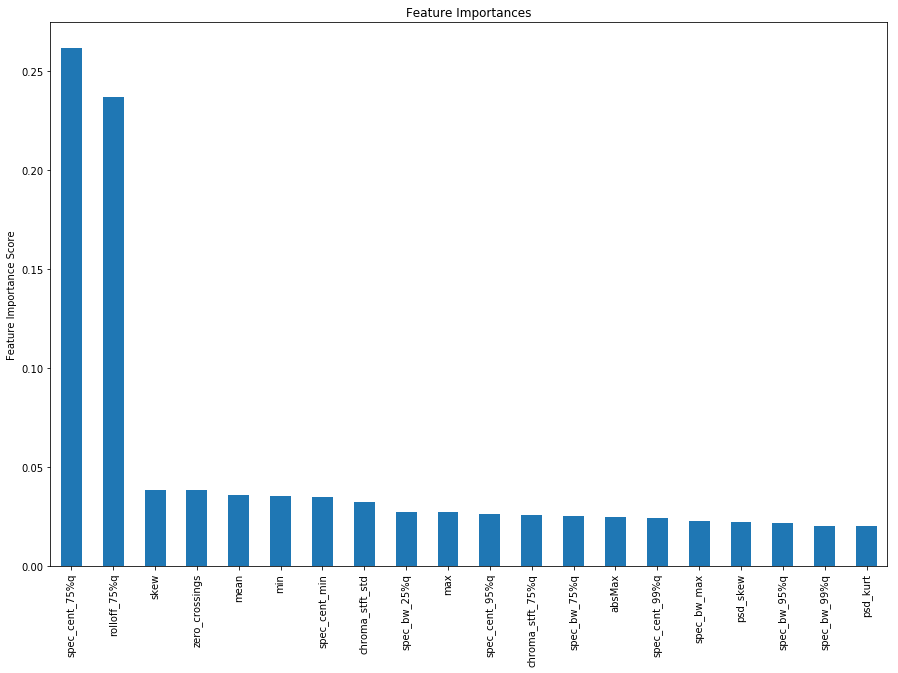

Top 20 Feature
['spec_cent_75%q', 'rolloff_75%q', 'skew', 'zero_crossings', 'mean', 'min', 'spec_cent_min', 'chroma_stft_std', 'spec_bw_25%q', 'max', 'spec_cent_95%q', 'chroma_stft_75%q', 'spec_bw_75%q', 'absMax', 'spec_cent_99%q', 'spec_bw_max', 'psd_skew', 'spec_bw_95%q', 'spec_bw_99%q', 'psd_kurt']


In [17]:
gbm0 = RandomForestRegressor(random_state=10)
modelfit(gbm0, filtered_feature_data, time_to_failure)

# Parameter Tuning 20 Features 4194 rows

### load data for parameter tuning (20 Features / 4194 rows)

In [50]:
train_data = pd.read_csv(earthquake_daten+Features_4194_94)
train_data = shuffle(train_data, random_state=10)


feature_data = train_data.iloc[:,1:95]
time_to_failure_tuning = np.array(train_data.iloc[:,-1])
# Erhalten aus dem Notebook Model_CatBoost_94
items_to_filter = ['spec_cent_75%q', 'rolloff_75%q', 'zero_crossings', 'skew', 'mean', 'min', 'spec_cent_95%q', 'spec_bw_75%q', 'chroma_stft_75%q', 'spec_bw_25%q', 'spec_cent_min', 'chroma_stft_std', 'psd_kurt', 'spec_cent_99%q', 'max', 'spec_bw_max', 'psd_skew', 'spec_bw_95%q', 'absMax', 'spec_bw_99%q']
filtered_feature_data_tuning = feature_data.filter(items=items_to_filter) 

## Baseline 20 Features 4194 rows

In [16]:
gbm0 = RandomForestRegressor(random_state=10, verbose = False)
modelfit(gbm0, filtered_feature_data, time_to_failure,printFeatureImportance=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Model Report
MAE train data: 0.5969
CV Score MAE: 
Mean -1.581617 
Std 0.008531993 
Min -1.592723 
Max -1.572425


### Tune max_depth and num_samples_split

In [27]:
param_test1 = {'max_depth':range(4,11,2), 'min_samples_split':range(8,17,2)}

gsearch1 = GridSearchCV(
    estimator = RandomForestRegressor(
        n_estimators=n_estimators, 
        max_features='sqrt', 
        random_state=10), 
    param_grid = param_test1, 
    scoring='neg_mean_absolute_error',
    iid=False,
    n_jobs=-1,
    cv=5)
gsearch1.fit(filtered_feature_data_tuning,time_to_failure_tuning)

print('Best params {}'.format(gsearch1.best_params_))
print('Best MAE score: {}'.format(gsearch1.best_score_))

Best params {'max_depth': 6, 'min_samples_split': 12}
Best MAE score: -2.0593993236685373


In [28]:
max_depth=6
min_samples_split=12

Tune min_samples_leaf

In [30]:
param_test2 = {'min_samples_leaf':range(2,13,2)}
gsearch2 = GridSearchCV(estimator = 
                        RandomForestRegressor(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            max_features='sqrt', 
                            random_state=10), 
                            param_grid = 
                            param_test2,
                            scoring='neg_mean_absolute_error',
                            iid=False,
                            n_jobs=-1,
                            cv=5)
gsearch2.fit(filtered_feature_data_tuning,time_to_failure_tuning)
print('Best params {}'.format(gsearch2.best_params_))
print('Best MAE score: {}'.format(gsearch2.best_score_))

Best params {'min_samples_leaf': 4}
Best MAE score: -2.0591881693864797


In [31]:
min_samples_leaf=4

In [33]:
param_test3 = {'max_features':range(1,15,2)}
gsearch3 = GridSearchCV(estimator = 
                        RandomForestRegressor(
                            n_estimators=n_estimators,
                            max_depth=max_depth, 
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=10),
                            param_grid = param_test3, 
                            scoring='neg_mean_absolute_error',
                            iid=False,
                            n_jobs=-1,
                            cv=5)
gsearch3.fit(filtered_feature_data_tuning,time_to_failure_tuning)
print('Best params {}'.format(gsearch3.best_params_))
print('Best MAE score: {}'.format(gsearch3.best_score_))

Best params {'max_features': 7}
Best MAE score: -2.0560630548759766


In [34]:
max_features = 7

In [35]:
param_test4 = {'n_estimators' :[200,500,1000,1500]}
gsearch4 = GridSearchCV(estimator = 
                        RandomForestRegressor(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features,
                            random_state=10),
                        param_grid = param_test4,
                        scoring='neg_mean_absolute_error',
                        iid=False,
                        n_jobs=-1,
                        cv=5)

gsearch4.fit(filtered_feature_data_tuning,time_to_failure_tuning)
print('Best params {}'.format(gsearch4.best_params_))
print('Best MAE score: {}'.format(gsearch4.best_score_))

Best params {'n_estimators': 200}
Best MAE score: -2.055618686055179


In [ ]:
modelfit(gsearch4.best_estimator_,  filtered_feature_data_tuning, time_to_failure_tuning)

In [18]:
n_estimators=200

In [38]:
param_test5 = {'criterion' :['mae','mse']}
gsearch5 = GridSearchCV(estimator = 
                        RandomForestRegressor(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features,
                            random_state=10),
                        param_grid = param_test5,
                        scoring='neg_mean_absolute_error',
                        iid=False,
                        n_jobs=-1,
                        cv=5)

gsearch5.fit(filtered_feature_data_tuning,time_to_failure_tuning)
print('Best params {}'.format(gsearch5.best_params_))
print('Best MAE score: {}'.format(gsearch5.best_score_))

Best params {'criterion': 'mae'}
Best MAE score: -2.024460981223998


### Tuned model with 20 Features / 4194 rows

In [19]:
model = RandomForestRegressor(criterion='mae', 
                              max_depth=6,
                              max_features=7, 
                              min_samples_leaf=4,
                              min_samples_split=12, 
                              n_estimators=200, random_state=10)
print(model)
                              
                              
modelfit(model,  filtered_feature_data_tuning, time_to_failure_tuning,printFeatureImportance=False)



RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=6,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=10,
           verbose=0, warm_start=False)

Model Report
MAE train data: 1.864
CV Score MAE: 
Mean -2.024461 
Std 0.06351341 
Min -2.120501 
Max -1.956727


## Validate (crossvalidation) tuned Model with 41934 rows

In [6]:
train_data = pd.read_csv(earthquake_daten+feature_41934_94)
train_data = shuffle(train_data, random_state=10)

feature_data = train_data.iloc[:,1:95]
time_to_failure_validation = np.array(train_data.iloc[:,-1])

items_to_filter = ['spec_cent_75%q', 'rolloff_75%q', 'zero_crossings', 'skew', 'mean', 'min', 'spec_cent_95%q', 'spec_bw_75%q', 'chroma_stft_75%q', 'spec_bw_25%q', 'spec_cent_min', 'chroma_stft_std', 'psd_kurt', 'spec_cent_99%q', 'max', 'spec_bw_max', 'psd_skew', 'spec_bw_95%q', 'absMax', 'spec_bw_99%q']
filtered_feature_data_validation = feature_data.filter(items=items_to_filter)

In [13]:
model = RandomForestRegressor(
                              max_depth=6,
                              max_features=7, 
                              min_samples_leaf=4,
                              min_samples_split=12, 
                              n_estimators=200, random_state=10)

modelfit(model,  filtered_feature_data_validation, time_to_failure_validation,performCV=True,printFeatureImportance=False)


Model Report
MAE train data: 1.986
CV Score MAE: 
Mean -2.008731 
Std 0.008681801 
Min -2.022601 
Max -1.998142
